[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


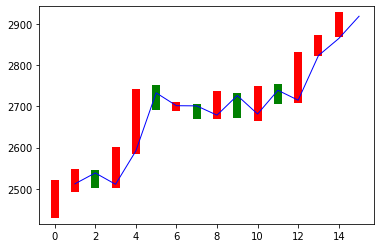

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#数据加载和图形绘制
date = np.linspace(1,15,15)
endPrice = np.array([2511.90,2538.26,2510.68,2591.66,2732.98,2701.69,2701.29,
                     2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08])
beginPrice = np.array([2438.71,2500.88,2534.95,2512.52,2594.04,2743.26,2697.47,
                     2695.24,2678.23,2722.13,2674.93,2744.13,2717.46,2832.73,2877.40])
print(date)
plt.figure()
for i in range(0,15):
    #1 柱状图
    dateOne = np.zeros([2])
    dateOne[0] = i;
    dateOne[1] = i;
    priceOne = np.zeros([2])
    priceOne[0] = beginPrice[i]
    priceOne[1] = endPrice[i]
    if endPrice[i] > beginPrice[i]:
        plt.plot(dateOne,priceOne, 'r', lw=8)
    else:
        plt.plot(dateOne,priceOne, 'g', lw=8)
#plt.show()
#A(15x1)*w1(1x10)+b1(1x10) = B(15x10)
#B(15x10)*w2(10x1)+b2(15x1) = C(15x1)
#1 A B C
#方便计算，将date和Price进行归一化
dateNormal = np.zeros([15,1])
priceNormal = np.zeros([15,1])
for i in range(0,15):
    dateNormal[i,0] = i/14.0
    priceNormal[i,0] = endPrice[i]/3000.0
x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32, [None,1])
#B
w1 = tf.Variable(tf.random_uniform([1,10],0,1))
b1 = tf.Variable(tf.zeros([1,10]))
wb1 = tf.matmul(x,w1)+b1
#可以直接传给隐藏层，也可以增加一个激励函数
#激励函数——把当前的乘加结果进行了一个映射，变成另外一个值
layer1 = tf.nn.relu(wb1)
#C
w2 = tf.Variable(tf.random_uniform([10,1],0,1))
b2 = tf.Variable(tf.zeros([15,1]))
wb2 = tf.matmul(layer1,w2)+b2
layer2 = tf.nn.relu(wb2)
#计算值与实际值差异

loss = tf.reduce_mean(tf.square(y-layer2)) #y 真实 layer2 计算标准差
#梯度下降法

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with  tf.Session() as  sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,10000):
        sess.run(train_step, feed_dict={x:dateNormal,y:priceNormal})
    #w1w1 b1b2 A + wb -> layer2
    pred = sess.run(layer2, feed_dict={x:dateNormal})
    predPrice = np.zeros([15,1])
    for i in range(0,15):
        predPrice[i,0] = (pred*3000)[i,0]
    plt.plot(date, predPrice, 'b', lw=1)
plt.show()